# 1. Importing the Necessary Libraries

In [1]:
import pandas as pd                                # To perform data manipulation
import numpy as np                                 # To perform some numerical operations
import seaborn as sns                              # For visualization
import matplotlib.pyplot as plt                    # For Visualization
from warnings import filterwarnings                # To remove warnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Data preprocessing

# 1.Data Collection:

In [3]:
train_data=pd.read_csv(r"/content/drive/MyDrive/Case Study Dataset/Telecom Churn Data - Train.csv")
test_data=pd.read_csv(r"/content/drive/MyDrive/Case Study Dataset/Telecom Churn Data - Test.csv")

# Train data

In [4]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE CATEGORY,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,CREDIT EXHAUSTION RATE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,State,Occupation,Credit Rating,Tenure,Tenure_Range,BILL_AMT_CAT,Churn_Jan,Churn_Feb,Churn_Mar,Churn_Apr,Churn_May,Churn_Jun,CHURN STATUS
0,2180788,600,Female,University,Married,21-30,2,2,0,0,0,0,117,93.06,20.67,NaN,NaN,NaN,0.13,NaN,20.67,NaN,NaN,NaN,NaN,Virginia,Salaried,Deep Prime,6,Less than 10,"Less than 1,000",0,0,0,0,0,0,Yes
1,6034804,"3,600",Female,University,Single,21-30,0,2,0,0,0,2,80,51.75,80.46,98.16,103.65,97.83,0.02,NaN,30.00,30.0,30.0,NaN,60.00,Texas,Salaried,Near Prime,12,10 to 15,"Less than 1,000",0,0,0,0,0,0,Yes
2,1443527,"2,700",Female,University,Single,31-40,0,0,0,0,0,0,877,420.81,406.77,429.93,448.44,466.47,0.19,45.54,45.00,30.0,30.0,30.00,150.00,Pennsylvania,Salaried,Near Prime,11,10 to 15,"Less than 1,000",0,0,0,0,0,0,No
3,1403217,"1,500",Female,University,Married,31-40,0,0,0,0,0,0,"1,410",1446.99,1478.73,849.42,868.77,886.41,0.77,60,60.57,36.0,33.0,32.07,30.00,Ohio,Salaried,Sub Prime,10,10 to 15,"1,000 to 5,000",0,0,0,0,0,0,No
4,8202289,"1,500",Male,University,Married,Above 50,0,0,0,0,0,0,259,170.10,1075.05,628.20,574.38,573.93,0.36,60,1100.43,300.0,270.0,20.67,20.37,Massachusetts,Salaried,Sub Prime,9,Less than 10,"Less than 1,000",0,0,0,0,0,0,No


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        24999 non-null  int64  
 1   LIMIT_BAL                 24999 non-null  object 
 2   SEX                       24999 non-null  object 
 3   EDUCATION                 24999 non-null  object 
 4   MARRIAGE                  24999 non-null  object 
 5   AGE CATEGORY              24999 non-null  object 
 6   PAY_1                     24999 non-null  int64  
 7   PAY_2                     24999 non-null  int64  
 8   PAY_3                     24999 non-null  int64  
 9   PAY_4                     24999 non-null  int64  
 10  PAY_5                     24999 non-null  int64  
 11  PAY_6                     24999 non-null  int64  
 12  BILL_AMT1                 23332 non-null  object 
 13  BILL_AMT2                 22888 non-null  float64
 14  BILL_A

** You have a train data with 14 categorical features and 24 numeric feature.**

# Test data

In [6]:
test_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE CATEGORY,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,CREDIT EXHAUSTION RATE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,State,Occupation,Credit Rating,Tenure,Tenure_Range,BILL_AMT_CAT,Churn_Jan,Churn_Feb,Churn_Mar,Churn_Apr,Churn_May,Churn_Jun
0,9401497.0,"12,300",Male,Graduate School,Married,31-40,0.0,0.0,0.0,0.0,0.0,0.0,15,NaN,1065.27,NaN,NaN,NaN,0.04,NaN,1065.27,NaN,NaN,NaN,NaN,North Carolina,Business,Super Prime,38.0,Above25,"Less than 1,000",0.0,0.0,0.0,0.0,0.0,0.0
1,2989381.0,"7,800",Male,University,Single,31-40,0.0,0.0,0.0,0.0,0.0,0.0,"14,802",12003.24,8919.39,8308.44,71.34,-81.27,0.94,369.75,198.99,206.67,30.75,61.41,5823.06,Georgia,Business,Prime,24.0,20 to 25,"5,000 to 10,000",0.0,0.0,0.0,0.0,0.0,0.0
2,9544891.0,"1,500",Male,University,Married,31-40,0.0,0.0,0.0,0.0,0.0,0.0,"1,516",295.59,340.59,364.29,352.59,357.66,0.36,36,120.00,60.00,60.00,30.00,30.00,New Jersey,Salaried,Sub Prime,6.0,Less than 10,"Less than 1,000",0.0,0.0,0.0,0.0,0.0,0.0
3,1866700.0,"10,800",Male,High School,Married,31-40,0.0,0.0,0.0,0.0,0.0,0.0,33,9.09,NaN,NaN,NaN,NaN,0,9.09,NaN,NaN,NaN,NaN,25.80,Illinois,Business,Super Prime,38.0,Above25,"Less than 1,000",0.0,0.0,0.0,0.0,0.0,0.0
4,149136.0,"1,500",Male,High School,Married,41-50,0.0,0.0,0.0,0.0,0.0,0.0,"1,458",1472.10,1502.28,1469.85,593.40,453.06,0.77,60,150.00,69.15,90.00,16.77,90.00,Virginia,Salaried,Sub Prime,7.0,Less than 10,"1,000 to 5,000",0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5000 non-null   float64
 1   LIMIT_BAL                 5000 non-null   object 
 2   SEX                       5000 non-null   object 
 3   EDUCATION                 5000 non-null   object 
 4   MARRIAGE                  5000 non-null   object 
 5   AGE CATEGORY              5000 non-null   object 
 6   PAY_1                     5000 non-null   float64
 7   PAY_2                     5000 non-null   float64
 8   PAY_3                     5000 non-null   float64
 9   PAY_4                     5000 non-null   float64
 10  PAY_5                     5000 non-null   float64
 11  PAY_6                     5000 non-null   float64
 12  BILL_AMT1                 4659 non-null   object 
 13  BILL_AMT2                 4605 non-null   float64
 14  BILL_A

** You have a test data with 13 categorical features and 24 numeric feature.**

# 3.Data Cleaning:
Remove duplicates, if any. Correct inconsistent or erroneous data. Handle outliers if necessary.

In [8]:
train_data.duplicated().sum()

0

**my train data does not contain any duplicate values.**

In [9]:
test_data.duplicated().sum()

24999

# 4.Handling Missing Data:

In [10]:
train_data.isna().sum()

ID                             0
LIMIT_BAL                      0
SEX                            0
EDUCATION                      0
MARRIAGE                       0
AGE CATEGORY                   0
PAY_1                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                   1667
BILL_AMT2                   2111
BILL_AMT3                   2399
BILL_AMT4                   2644
BILL_AMT5                   2938
BILL_AMT6                   3366
 CREDIT EXHAUSTION RATE        0
 PAY_AMT1                   4423
PAY_AMT2                    4514
PAY_AMT3                    5036
PAY_AMT4                    5392
PAY_AMT5                    5608
PAY_AMT6                    6074
State                          0
Occupation                     0
Credit Rating                  0
Tenure                         0
Tenure_Range                   0
BILL_AMT_C

<Axes: >

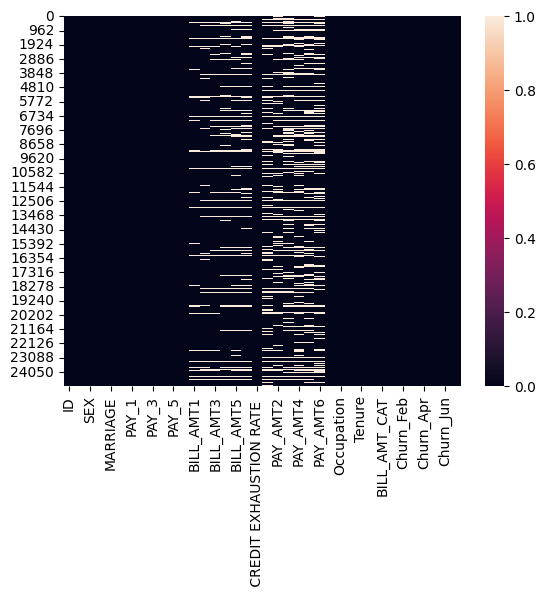

In [11]:
sns.heatmap(train_data.isnull())

In [12]:
train_data.dtypes

ID                            int64
LIMIT_BAL                    object
SEX                          object
EDUCATION                    object
MARRIAGE                     object
AGE CATEGORY                 object
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                    object
BILL_AMT2                   float64
BILL_AMT3                   float64
BILL_AMT4                   float64
BILL_AMT5                   float64
BILL_AMT6                   float64
 CREDIT EXHAUSTION RATE      object
 PAY_AMT1                    object
PAY_AMT2                    float64
PAY_AMT3                    float64
PAY_AMT4                    float64
PAY_AMT5                    float64
PAY_AMT6                    float64
State                        object
Occupation                   object
Credit Rating               

In [13]:
train_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE CATEGORY',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       ' CREDIT EXHAUSTION RATE ', ' PAY_AMT1 ', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'State', 'Occupation',
       'Credit Rating', 'Tenure', 'Tenure_Range', 'BILL_AMT_CAT', 'Churn_Jan',
       'Churn_Feb', 'Churn_Mar', 'Churn_Apr', 'Churn_May', 'Churn_Jun',
       'CHURN STATUS'],
      dtype='object')

In [14]:
train_data['LIMIT_BAL']

0          600
1        3,600
2        2,700
3        1,500
4        1,500
         ...  
24994    1,500
24995    4,800
24996    2,400
24997    6,300
24998      900
Name: LIMIT_BAL, Length: 24999, dtype: object

In [15]:
def remove_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

In [16]:
train_data['LIMIT_BAL'].apply(remove_comma)

0         600.0
1        3600.0
2        2700.0
3        1500.0
4        1500.0
          ...  
24994    1500.0
24995    4800.0
24996    2400.0
24997    6300.0
24998     900.0
Name: LIMIT_BAL, Length: 24999, dtype: float64

In [17]:
train_data['LIMIT_BAL']=train_data['LIMIT_BAL'].apply(remove_comma)

In [18]:
train_data['BILL_AMT1']

0          117
1           80
2          877
3        1,410
4          259
         ...  
24994    1,398
24995    4,542
24996    2,048
24997    6,025
24998      855
Name: BILL_AMT1, Length: 24999, dtype: object

In [19]:
train_data['BILL_AMT1'].apply(remove_comma)

0         117.0
1          80.0
2         877.0
3        1410.0
4         259.0
          ...  
24994    1398.0
24995    4542.0
24996    2048.0
24997    6025.0
24998     855.0
Name: BILL_AMT1, Length: 24999, dtype: float64

In [20]:
train_data['BILL_AMT1']=train_data['BILL_AMT1'].apply(remove_comma)

In [21]:
train_data[' PAY_AMT1 '].value_counts()

60          1134
90           728
150          588
45           432
120          364
            ... 
85.68          1
330.39         1
1,238.25       1
726.03         1
189.75         1
Name:  PAY_AMT1 , Length: 7107, dtype: int64

In [22]:
train_data[' PAY_AMT1 ']=train_data[' PAY_AMT1 '].apply(remove_comma)

In [23]:
train_data[' CREDIT EXHAUSTION RATE '].value_counts()

0.01    1955
0       1404
0.02    1185
0.03     835
         717
        ... 
1.37       1
1.74       1
2.27       1
1.45       1
2.64       1
Name:  CREDIT EXHAUSTION RATE , Length: 196, dtype: int64

In [24]:
train_data[' CREDIT EXHAUSTION RATE ']=pd.to_numeric(train_data[' CREDIT EXHAUSTION RATE '], errors='coerce')

In [25]:
train_data[' CREDIT EXHAUSTION RATE ']

0        0.13
1        0.02
2        0.19
3        0.77
4        0.36
         ... 
24994    0.76
24995    0.88
24996    0.91
24997    0.40
24998    0.88
Name:  CREDIT EXHAUSTION RATE , Length: 24999, dtype: float64

In [26]:
train_data.dtypes

ID                            int64
LIMIT_BAL                   float64
SEX                          object
EDUCATION                    object
MARRIAGE                     object
AGE CATEGORY                 object
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                   float64
BILL_AMT2                   float64
BILL_AMT3                   float64
BILL_AMT4                   float64
BILL_AMT5                   float64
BILL_AMT6                   float64
 CREDIT EXHAUSTION RATE     float64
 PAY_AMT1                   float64
PAY_AMT2                    float64
PAY_AMT3                    float64
PAY_AMT4                    float64
PAY_AMT5                    float64
PAY_AMT6                    float64
State                        object
Occupation                   object
Credit Rating               

# Now will Seprate all Numerical and categorical data

In [27]:
num_train_data=train_data.select_dtypes(exclude='object')
num_train_data.head(3)

,ID,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,CREDIT EXHAUSTION RATE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Tenure,Churn_Jan,Churn_Feb,Churn_Mar,Churn_Apr,Churn_May,Churn_Jun
0,2180788,600.0,2,2,0,0,0,0,117.0,93.06,20.67,NaN,NaN,NaN,0.13,NaN,20.67,NaN,NaN,NaN,NaN,6,0,0,0,0,0,0
1,6034804,3600.0,0,2,0,0,0,2,80.0,51.75,80.46,98.16,103.65,97.83,0.02,NaN,30.00,30.0,30.0,NaN,60.0,12,0,0,0,0,0,0
2,1443527,2700.0,0,0,0,0,0,0,877.0,420.81,406.77,429.93,448.44,466.47,0.19,45.54,45.00,30.0,30.0,30.0,150.0,11,0,0,0,0,0,0


In [28]:
cat_train_data=train_data.select_dtypes(include='object')
cat_train_data.head(3)

,SEX,EDUCATION,MARRIAGE,AGE CATEGORY,State,Occupation,Credit Rating,Tenure_Range,BILL_AMT_CAT,CHURN STATUS
0,Female,University,Married,21-30,Virginia,Salaried,Deep Prime,Less than 10,"Less than 1,000",Yes
1,Female,University,Single,21-30,Texas,Salaried,Near Prime,10 to 15,"Less than 1,000",Yes
2,Female,University,Single,31-40,Pennsylvania,Salaried,Near Prime,10 to 15,"Less than 1,000",No


In [29]:
num_train_data.isna().sum()

ID                             0
LIMIT_BAL                      0
PAY_1                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                   1667
BILL_AMT2                   2111
BILL_AMT3                   2399
BILL_AMT4                   2644
BILL_AMT5                   2938
BILL_AMT6                   3366
 CREDIT EXHAUSTION RATE      721
 PAY_AMT1                   4423
PAY_AMT2                    4514
PAY_AMT3                    5036
PAY_AMT4                    5392
PAY_AMT5                    5608
PAY_AMT6                    6074
Tenure                         0
Churn_Jan                      0
Churn_Feb                      0
Churn_Mar                      0
Churn_Apr                      0
Churn_May                      0
Churn_Jun                      0
dtype: int64

In [30]:
cat_train_data.isna().sum()

SEX              0
EDUCATION        0
MARRIAGE         0
AGE CATEGORY     0
State            0
Occupation       0
Credit Rating    0
Tenure_Range     0
BILL_AMT_CAT     0
CHURN STATUS     0
dtype: int64

for i in num_train_data:
    print(i)
    sns.boxplot(train_data[i])
    plt.show()
    sns.distplot(train_data[i])
    plt.show()

<Axes: ylabel='Churn_Jan'>

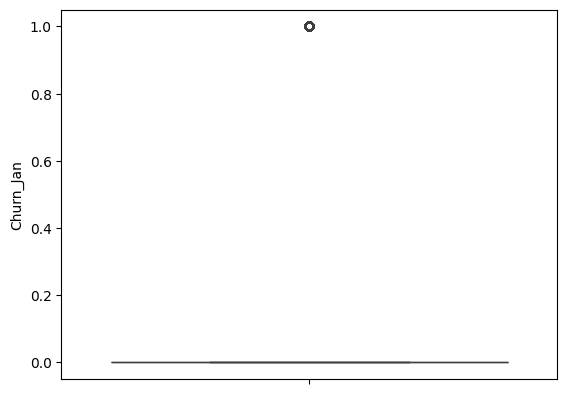

In [32]:
sns.boxplot(train_data.Churn_Jan)

In [33]:
# in the Cost2plate column has null values then i need to remove those
Q1 = train_data.Churn_Jan.quantile(0.25)
Q3 = train_data.Churn_Jan.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

0.0 0.0
0.0


(0.0, 0.0)

In [34]:
train_data[(train_data.Churn_Jan<lower_limit)|(train_data.Churn_Jan>upper_limit)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE CATEGORY,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,CREDIT EXHAUSTION RATE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,State,Occupation,Credit Rating,Tenure,Tenure_Range,BILL_AMT_CAT,Churn_Jan,Churn_Feb,Churn_Mar,Churn_Apr,Churn_May,Churn_Jun,CHURN STATUS
915,9957745,6000.0,Male,Graduate School,Married,31-40,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,119.49,0.02,NaN,NaN,NaN,NaN,119.49,NaN,Massachusetts,Salaried,Prime,24,20 to 25,"Less than 1,000",1,0,0,0,0,0,No
1037,4126820,5400.0,Male,High School,Married,Above 50,0,0,0,0,0,0,4491.0,4117.80,3735.00,3342.90,2945.46,2537.94,0.65,145.02,131.13,115.47,102.15,86.61,72.06,Virginia,Salaried,Prime,16,15 to 20,"1,000 to 5,000",1,0,0,0,0,0,Yes
1083,5160200,1500.0,Female,Graduate School,Single,21-30,1,2,2,2,2,2,1412.0,1440.24,1467.39,1495.41,1525.20,1485.06,0.98,60.00,60.00,60.00,57.00,57.00,48.00,New York,Business,Sub Prime,11,10 to 15,"1,000 to 5,000",1,0,0,0,0,0,Yes
1203,8882306,1800.0,Female,University,Single,21-30,2,2,0,0,0,0,75.0,NaN,NaN,NaN,45.72,762.63,0.16,NaN,NaN,NaN,45.72,762.63,30.00,Illinois,Business,Sub Prime,9,Less than 10,"Less than 1,000",1,0,0,0,0,0,No
1215,5506797,6900.0,Male,Graduate School,Single,31-40,0,0,0,0,0,0,4939.0,4984.02,4261.47,3200.31,2642.73,1827.87,0.53,219.78,300.00,300.00,90.00,60.00,60.00,New York,Salaried,Prime,24,20 to 25,"1,000 to 5,000",1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24782,5568893,10800.0,Male,University,Married,41-50,0,0,0,0,0,0,55.0,52.20,NaN,NaN,44.97,120.03,0.01,52.20,NaN,NaN,44.97,120.03,6.09,North Carolina,Salaried,Super Prime,24,20 to 25,"Less than 1,000",1,0,0,0,0,1,No
24853,2423016,15000.0,Male,University,Married,41-50,0,0,0,0,0,0,521.0,395.10,320.91,592.71,154.74,1315.77,0.04,396.66,322.74,596.49,155.40,1321.92,1243.50,Florida,Business,Super Prime,33,Above25,"Less than 1,000",1,0,0,0,1,0,No
24940,699205,1800.0,Male,University,Married,31-40,0,0,2,0,0,0,2188.0,2133.69,2022.15,1906.77,1801.44,1693.74,1.09,150.00,90.00,90.00,90.00,60.00,90.00,Virginia,Salaried,Sub Prime,7,Less than 10,"1,000 to 5,000",1,0,0,0,0,0,No
24954,1709165,5400.0,Male,Graduate School,Single,21-30,0,0,0,0,0,0,43.0,53.55,13.05,64.35,92.70,124.95,0.01,53.55,13.05,64.35,92.70,124.95,504.84,Georgia,Business,Prime,14,10 to 15,"Less than 1,000",1,0,0,0,0,1,No


<Axes: ylabel=' PAY_AMT1 '>

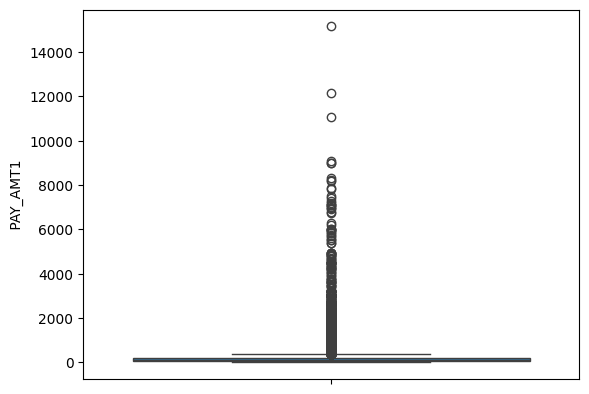

In [35]:
sns.boxplot(train_data[' PAY_AMT1 '])

In [36]:
train_data[' PAY_AMT1 '].value_counts()

60.00      1134
90.00       728
150.00      588
45.00       432
120.00      364
           ... 
85.68         1
330.39        1
1238.25       1
726.03        1
189.75        1
Name:  PAY_AMT1 , Length: 7107, dtype: int64

In [37]:
# in the Cost2plate column has null values then i need to remove those
Q1 = train_data[' PAY_AMT1 '].quantile(0.25)
Q3 = train_data[' PAY_AMT1 '].quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

48.5025 180.0
131.4975


(-148.74375, 377.24625000000003)

In [38]:
train_data[(train_data[' PAY_AMT1 ']<lower_limit)|(train_data[' PAY_AMT1 ']>upper_limit)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE CATEGORY,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,CREDIT EXHAUSTION RATE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,State,Occupation,Credit Rating,Tenure,Tenure_Range,BILL_AMT_CAT,Churn_Jan,Churn_Feb,Churn_Mar,Churn_Apr,Churn_May,Churn_Jun,CHURN STATUS
6,4497215,15000.0,Male,Graduate School,Single,21-30,0,0,0,0,0,0,11039.0,12360.69,13350.21,16279.59,14490.09,14218.32,0.91,1650.00,1200.00,1140.00,607.17,412.50,413.10,New York,Salaried,Super Prime,44,Above25,"10,000 to 20,000",0,0,0,0,0,0,No
11,5625790,7800.0,Female,Graduate School,Single,Above 50,0,0,0,0,0,2,368.0,650.10,298.98,255.51,668.61,410.04,0.06,654.54,298.98,257.49,669.03,NaN,109.20,Arkansas,Salaried,Prime,22,20 to 25,"Less than 1,000",0,0,0,0,0,0,No
23,1730446,13500.0,Female,Graduate School,Married,31-40,0,0,0,0,0,0,165.0,582.60,44.19,16.80,NaN,NaN,0.01,582.84,44.19,16.80,NaN,NaN,33.84,New Jersey,Business,Sub Prime,7,Less than 10,"Less than 1,000",0,0,0,0,0,0,Yes
30,7485438,6900.0,Female,Graduate School,Single,21-30,0,0,0,0,0,0,499.0,517.95,397.98,460.17,429.21,1107.69,0.08,518.10,398.43,460.17,429.21,1118.76,NaN,Washington,Salaried,Prime,24,20 to 25,"Less than 1,000",0,1,0,0,0,0,No
48,3946953,11400.0,Male,University,Single,31-40,0,0,0,0,0,0,672.0,646.20,454.02,960.54,355.47,356.19,0.05,646.20,454.14,740.31,355.53,356.25,247.53,Ohio,Salaried,Super Prime,30,Above25,"Less than 1,000",0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24916,6879565,6000.0,Male,University,Single,31-40,0,0,0,0,0,0,5261.0,4529.07,4615.68,4692.03,4779.00,4817.13,0.80,750.03,171.03,167.28,180.27,174.33,184.68,Illinois,Salaried,Prime,22,20 to 25,"1,000 to 5,000",0,0,0,0,0,0,Yes
24920,819588,12900.0,Male,Graduate School,Married,31-40,0,0,0,0,0,0,1319.0,1383.81,10082.19,9763.89,1148.70,654.00,0.31,1528.26,9764.10,600.09,1172.04,654.00,10538.46,Michigan,Salaried,Super Prime,32,Above25,"1,000 to 5,000",0,0,1,0,0,0,No
24952,7723345,900.0,Male,University,Single,21-30,0,0,0,0,0,0,906.0,834.78,860.16,888.66,908.13,736.08,0.95,840.00,48.00,45.00,30.00,30.00,30.00,California,Salaried,Deep Prime,9,Less than 10,"Less than 1,000",0,0,0,0,0,0,Yes
24980,6345664,2400.0,Male,Graduate School,Single,31-40,0,0,0,0,0,0,32.0,1113.06,1143.36,1202.37,1231.20,1289.82,0.42,1116.00,60.00,90.00,60.00,90.00,60.00,Illinois,Salaried,Near Prime,23,20 to 25,"1,000 to 5,000",0,0,0,0,0,0,No


In [39]:
for column in train_data:
    if train_data[column].isnull().any():
        if column in num_train_data:
            train_data[column] = train_data[column].fillna(train_data[column].median())
        else:
            train_data[column] = train_data[column].fillna(train_data[column].mode()[0])


In [40]:
train_data.isna().sum()

ID                          0
LIMIT_BAL                   0
SEX                         0
EDUCATION                   0
MARRIAGE                    0
AGE CATEGORY                0
PAY_1                       0
PAY_2                       0
PAY_3                       0
PAY_4                       0
PAY_5                       0
PAY_6                       0
BILL_AMT1                   0
BILL_AMT2                   0
BILL_AMT3                   0
BILL_AMT4                   0
BILL_AMT5                   0
BILL_AMT6                   0
 CREDIT EXHAUSTION RATE     0
 PAY_AMT1                   0
PAY_AMT2                    0
PAY_AMT3                    0
PAY_AMT4                    0
PAY_AMT5                    0
PAY_AMT6                    0
State                       0
Occupation                  0
Credit Rating               0
Tenure                      0
Tenure_Range                0
BILL_AMT_CAT                0
Churn_Jan                   0
Churn_Feb                   0
Churn_Mar 

# 5.data analysis

In [41]:
train_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE CATEGORY',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       ' CREDIT EXHAUSTION RATE ', ' PAY_AMT1 ', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'State', 'Occupation',
       'Credit Rating', 'Tenure', 'Tenure_Range', 'BILL_AMT_CAT', 'Churn_Jan',
       'Churn_Feb', 'Churn_Mar', 'Churn_Apr', 'Churn_May', 'Churn_Jun',
       'CHURN STATUS'],
      dtype='object')

for column in train_data.columns:
    print(f"Value counts for column '{column}':")
    print(train_data[column].value_counts())
    print("\n")

# 6.Data Visualization:

for i in cat_train_data:
    print(i)
    print(train_data[i].unique())
    print('Number of unique values =', train_data[i].nunique())
    sns.countplot(data=train_data, x=i)  # Specify 'x' as the categorical variable.
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed.
    plt.show()

for i in cat_train_data:
    print(i)
    print(train_data[i].unique())
    print('Number of unique values =', train_data[i].nunique())

    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x=i, hue='CHURN STATUS')
    plt.title(f'Countplot for {i} with CHURN STATUS')
    plt.xticks(rotation=45)
    plt.show()

# Insights:
1. Males exhibit a higher frequency compared to females.
2. Individuals with a university education are predominant.
3. Single individuals comprise a substantial proportion.
4. The age group of 21-30 dominates the dataset.
5. The state of Massachusetts stands out with a high representation.
6. There is a similarity in representation between the 'Salaried' and 'Business' occupations.
7. A significant number of individuals have a high prime credit rate.
8. Customers with a tenure range of 10-15 are prevalent.
9. A considerable number of customers fall into the 'BILL_AMT_CAT' less than 1000 category.
10. The majority of customers have a "no" churn status compared to "yes".

In [45]:
train_data.corr()

,ID,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,CREDIT EXHAUSTION RATE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Tenure,Churn_Jan,Churn_Feb,Churn_Mar,Churn_Apr,Churn_May,Churn_Jun
ID,1.000000,-0.006918,0.006191,0.004792,0.007715,0.009072,0.006744,0.001175,0.000472,-0.000410,-0.001535,-0.001713,-0.001394,-0.005919,0.007462,0.003693,-0.003522,-0.002967,0.001403,-0.011495,0.001623,-0.007202,-0.003353,-0.004303,-0.002938,0.003314,-0.010383,0.003315
LIMIT_BAL,-0.006918,1.000000,-0.169303,-0.199414,-0.193740,-0.178335,-0.168208,-0.168154,0.297512,0.292267,0.299165,0.308793,0.306968,0.299395,-0.393475,0.208863,0.198857,0.218795,0.208146,0.218412,0.222767,0.700371,-0.003599,-0.000441,0.003341,-0.000902,0.002767,-0.001027
PAY_1,0.006191,-0.169303,1.000000,0.701848,0.517981,0.458508,0.422270,0.371840,0.007968,0.010996,0.014781,0.023183,0.030729,0.028620,0.192866,-0.065233,-0.051014,-0.057006,-0.059059,-0.045436,-0.044683,-0.131915,0.000164,0.006863,-0.000362,0.001210,-0.001488,-0.001564
PAY_2,0.004792,-0.199414,0.701848,1.000000,0.663242,0.513900,0.464708,0.408813,0.002289,0.004916,0.013057,0.023530,0.031692,0.033001,0.210918,-0.078278,-0.052381,-0.055922,-0.053552,-0.047015,-0.041544,-0.150667,0.003843,0.005731,-0.008785,0.004546,-0.001684,-0.004230
PAY_3,0.007715,-0.193740,0.517981,0.663242,1.000000,0.683949,0.559007,0.501453,-0.031384,-0.016547,-0.011627,0.003912,0.013501,0.016254,0.172956,-0.035314,-0.062310,-0.052574,-0.052036,-0.049239,-0.047281,-0.146403,-0.002870,0.003155,-0.007648,0.003201,-0.006616,0.010633
PAY_4,0.009072,-0.178335,0.458508,0.513900,0.683949,1.000000,0.750615,0.605746,-0.029592,-0.019681,-0.006741,0.008803,0.019565,0.024501,0.159745,-0.050124,-0.033603,-0.058394,-0.050618,-0.048185,-0.045685,-0.134289,-0.002029,0.002267,-0.003744,0.010463,-0.003268,0.003632
PAY_5,0.006744,-0.168208,0.422270,0.464708,0.559007,0.750615,1.000000,0.736399,-0.020498,-0.012495,-0.001500,0.019850,0.030995,0.035534,0.155636,-0.048404,-0.037095,-0.031157,-0.053542,-0.046090,-0.043665,-0.126974,-0.004352,0.001174,-0.002256,0.017655,-0.011255,0.002151
PAY_6,0.001175,-0.168154,0.371840,0.408813,0.501453,0.605746,0.736399,1.000000,-0.022823,-0.014658,-0.003272,0.015719,0.033675,0.036254,0.147555,-0.043121,-0.037055,-0.036981,-0.027122,-0.052581,-0.040400,-0.123296,-0.009769,0.008448,-0.006485,0.018063,0.000566,0.004856
BILL_AMT1,0.000472,0.297512,0.007968,0.002289,-0.031384,-0.029592,-0.020498,-0.022823,1.000000,0.950282,0.889490,0.854833,0.827940,0.803223,0.481553,0.127511,0.097489,0.151537,0.152575,0.162809,0.158444,0.210659,-0.001687,-0.002516,0.001022,0.009773,-0.007439,0.005379
BILL_AMT2,-0.000410,0.292267,0.010996,0.004916,-0.016547,-0.019681,-0.012495,-0.014658,0.950282,1.000000,0.923042,0.885663,0.856450,0.828708,0.495780,0.271007,0.084470,0.143846,0.138779,0.150470,0.155536,0.206888,-0.001447,-0.002336,0.001228,0.007740,-0.008189,0.004360


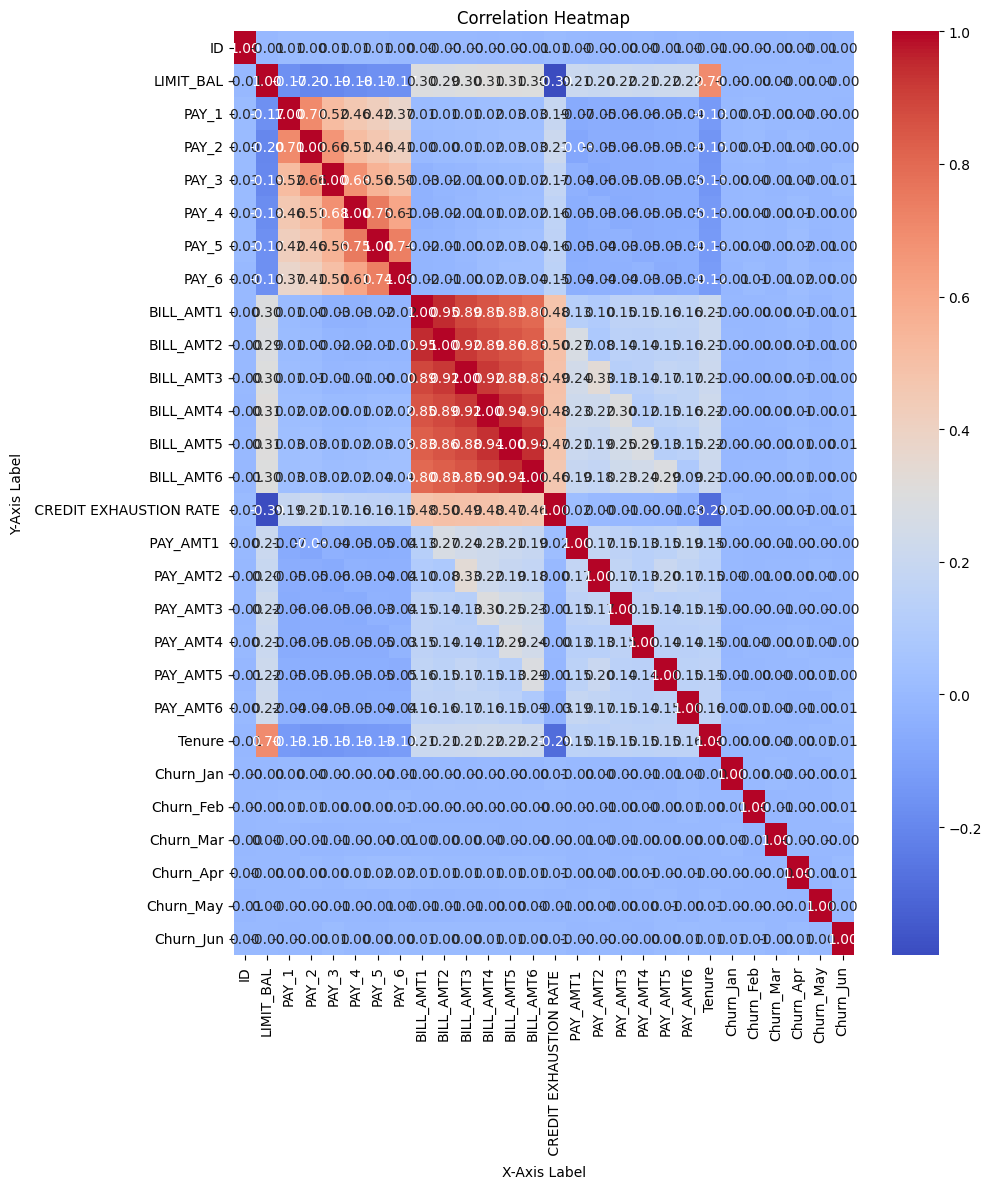

In [46]:
# Sample correlation matrix
correlation_matrix = train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [47]:
pay_corr=np.corrcoef(train_data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6']], rowvar=False)
pay_corr

array([[1.        , 0.70184788, 0.51798139, 0.45850826, 0.42226951,
        0.37184024],
       [0.70184788, 1.        , 0.66324209, 0.5139004 , 0.4647077 ,
        0.40881303],
       [0.51798139, 0.66324209, 1.        , 0.68394899, 0.55900699,
        0.5014535 ],
       [0.45850826, 0.5139004 , 0.68394899, 1.        , 0.75061485,
        0.60574596],
       [0.42226951, 0.4647077 , 0.55900699, 0.75061485, 1.        ,
        0.73639943],
       [0.37184024, 0.40881303, 0.5014535 , 0.60574596, 0.73639943,
        1.        ]])

In [48]:
Bill_cof=np.corrcoef(train_data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6']], rowvar=False)
Bill_cof

array([[1.        , 0.95028202, 0.88948967, 0.85483323, 0.82794015,
        0.80322313],
       [0.95028202, 1.        , 0.92304231, 0.88566267, 0.85644977,
        0.82870811],
       [0.88948967, 0.92304231, 1.        , 0.92215963, 0.88444712,
        0.85325966],
       [0.85483323, 0.88566267, 0.92215963, 1.        , 0.93943626,
        0.89928511],
       [0.82794015, 0.85644977, 0.88444712, 0.93943626, 1.        ,
        0.94368435],
       [0.80322313, 0.82870811, 0.85325966, 0.89928511, 0.94368435,
        1.        ]])

In [49]:
train_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE CATEGORY',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       ' CREDIT EXHAUSTION RATE ', ' PAY_AMT1 ', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'State', 'Occupation',
       'Credit Rating', 'Tenure', 'Tenure_Range', 'BILL_AMT_CAT', 'Churn_Jan',
       'Churn_Feb', 'Churn_Mar', 'Churn_Apr', 'Churn_May', 'Churn_Jun',
       'CHURN STATUS'],
      dtype='object')

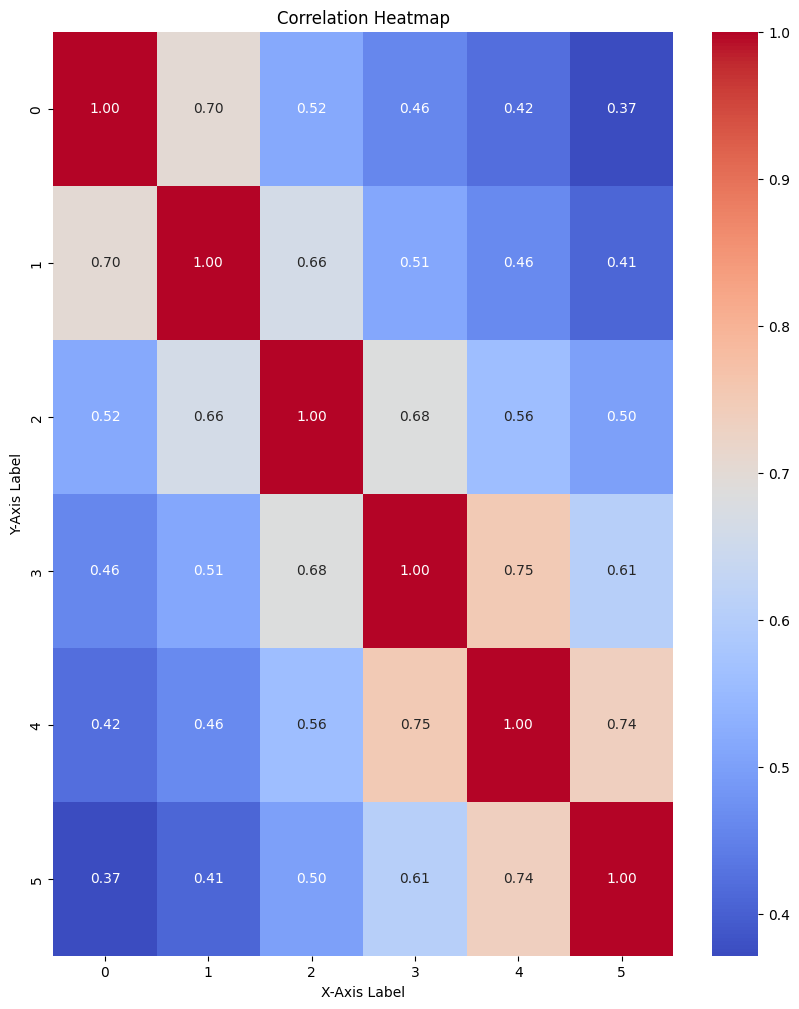

In [50]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(pay_corr, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

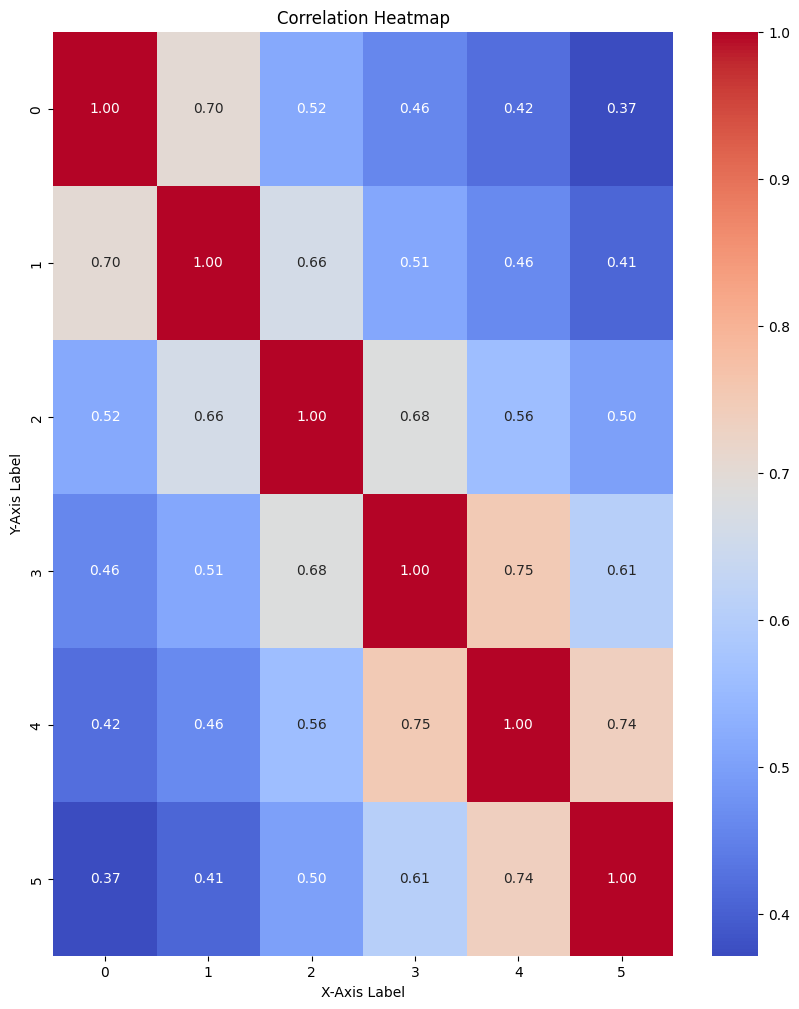

In [51]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(pay_corr, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

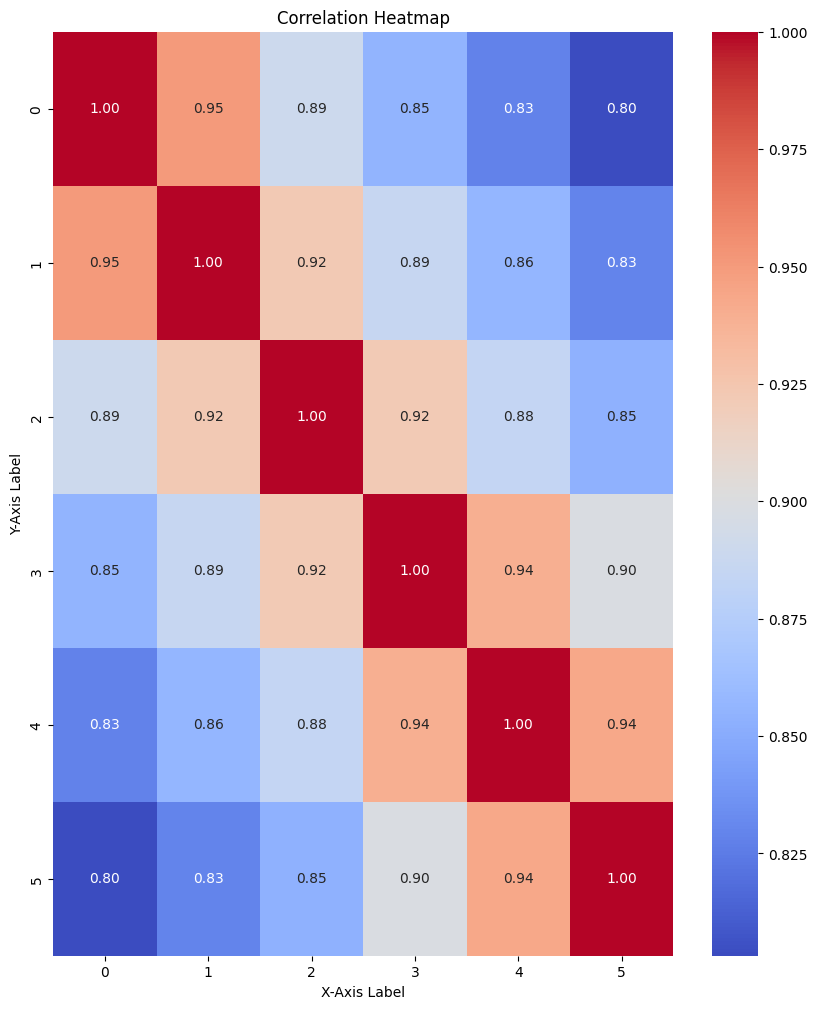

In [52]:


# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(Bill_cof, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [53]:
train_data.drop([ 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6'],axis=1,inplace=True)

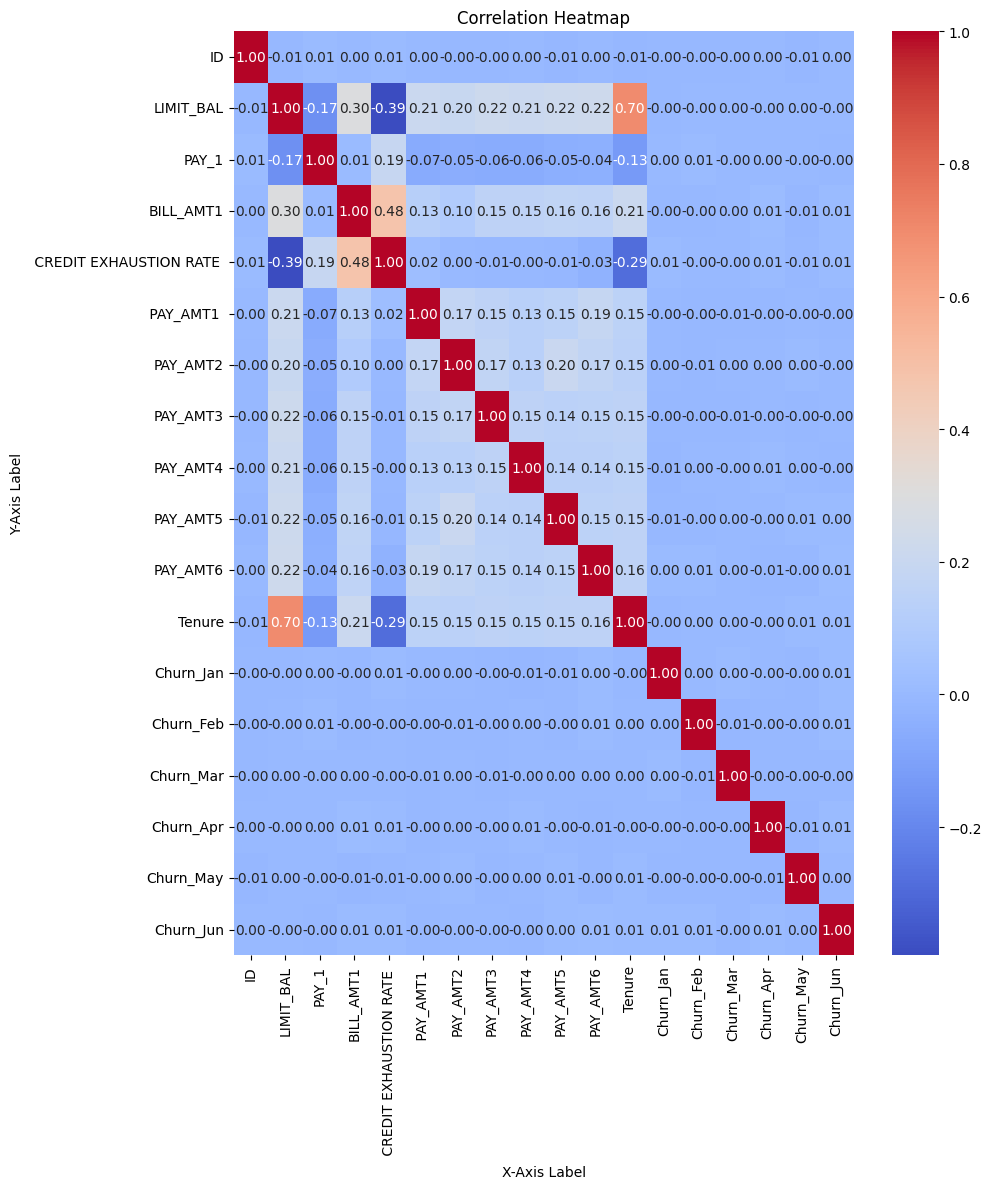

In [54]:
# Sample correlation matrix
correlation_matrix = train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [55]:
limit_Ten=np.corrcoef(train_data[['LIMIT_BAL', 'Tenure']], rowvar=False)
limit_Ten

array([[1.        , 0.70037094],
       [0.70037094, 1.        ]])

In [56]:
train_data.drop('Tenure',axis=1,inplace=True)

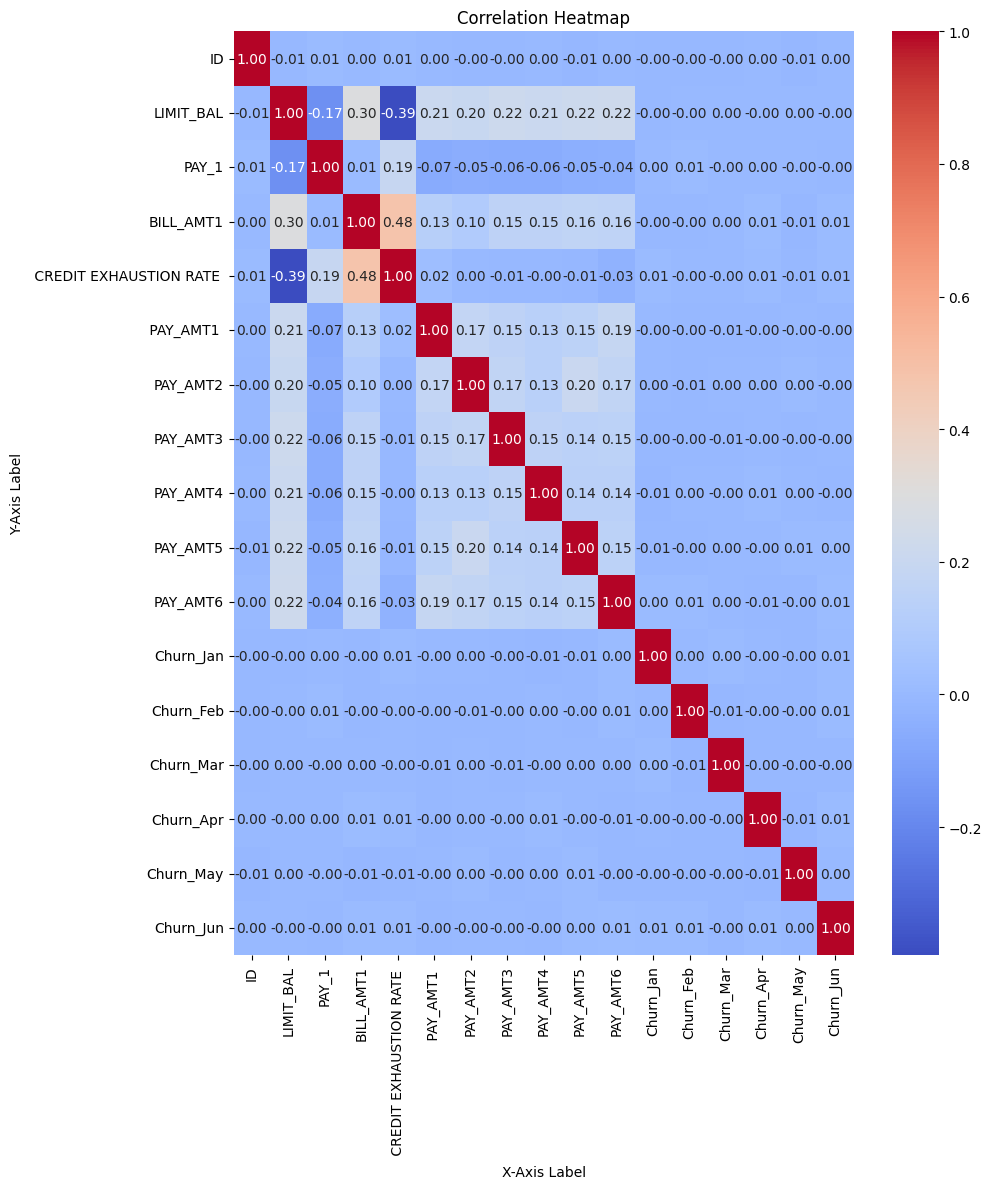

In [57]:
# Sample correlation matrix
correlation_matrix = train_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")  # 'annot' displays the correlation values, 'fmt' formats the annotation

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

# 7.Data Transformation and Feature Engineering:

In [58]:
train_data.dtypes

ID                            int64
LIMIT_BAL                   float64
SEX                          object
EDUCATION                    object
MARRIAGE                     object
AGE CATEGORY                 object
PAY_1                         int64
BILL_AMT1                   float64
 CREDIT EXHAUSTION RATE     float64
 PAY_AMT1                   float64
PAY_AMT2                    float64
PAY_AMT3                    float64
PAY_AMT4                    float64
PAY_AMT5                    float64
PAY_AMT6                    float64
State                        object
Occupation                   object
Credit Rating                object
Tenure_Range                 object
BILL_AMT_CAT                 object
Churn_Jan                     int64
Churn_Feb                     int64
Churn_Mar                     int64
Churn_Apr                     int64
Churn_May                     int64
Churn_Jun                     int64
CHURN STATUS                 object
dtype: object

In [59]:
train_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE CATEGORY',
       'PAY_1', 'BILL_AMT1', ' CREDIT EXHAUSTION RATE ', ' PAY_AMT1 ',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'State',
       'Occupation', 'Credit Rating', 'Tenure_Range', 'BILL_AMT_CAT',
       'Churn_Jan', 'Churn_Feb', 'Churn_Mar', 'Churn_Apr', 'Churn_May',
       'Churn_Jun', 'CHURN STATUS'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
train_data['SEX']=LE.fit_transform(train_data['SEX'])
train_data['EDUCATION']=LE.fit_transform(train_data['EDUCATION'])
train_data['MARRIAGE']=LE.fit_transform(train_data['MARRIAGE'])
train_data['AGE CATEGORY']=LE.fit_transform(train_data['AGE CATEGORY'])
train_data['State']=LE.fit_transform(train_data['State'])
train_data['Occupation']=LE.fit_transform(train_data['Occupation'])
train_data['Tenure_Range']=LE.fit_transform(train_data['Tenure_Range'])
train_data['BILL_AMT_CAT']=LE.fit_transform(train_data['BILL_AMT_CAT'])
train_data['CHURN STATUS']=LE.fit_transform(train_data['CHURN STATUS'])

In [61]:
train_data['Credit Rating']=LE.fit_transform(train_data['Credit Rating'])

In [62]:
train_data.dtypes

ID                            int64
LIMIT_BAL                   float64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE CATEGORY                  int64
PAY_1                         int64
BILL_AMT1                   float64
 CREDIT EXHAUSTION RATE     float64
 PAY_AMT1                   float64
PAY_AMT2                    float64
PAY_AMT3                    float64
PAY_AMT4                    float64
PAY_AMT5                    float64
PAY_AMT6                    float64
State                         int64
Occupation                    int64
Credit Rating                 int64
Tenure_Range                  int64
BILL_AMT_CAT                  int64
Churn_Jan                     int64
Churn_Feb                     int64
Churn_Mar                     int64
Churn_Apr                     int64
Churn_May                     int64
Churn_Jun                     int64
CHURN STATUS                  int64
dtype: object

# 8.Data Splitting:

In [63]:
# Separate object for target feature
y= train_data['CHURN STATUS']

# Separate object for Predictors
X = train_data.drop('CHURN STATUS',axis=1)

In [64]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (24999, 26), Dependent Features Shape = (24999,)


In [65]:
X.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE CATEGORY,PAY_1,BILL_AMT1,CREDIT EXHAUSTION RATE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,State,Occupation,Credit Rating,Tenure_Range,BILL_AMT_CAT,Churn_Jan,Churn_Feb,Churn_Mar,Churn_Apr,Churn_May,Churn_Jun
count,2.499900e+04,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.00000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.00000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,5.020550e+06,4988.039922,0.396616,1.606904,1.086043,0.973159,0.362174,1579.99204,0.394787,182.530835,191.431559,166.204156,158.374153,160.045919,173.451386,7.295292,0.49974,1.831793,1.806152,1.950718,0.019281,0.019841,0.018881,0.016681,0.019321,0.018561
std,2.886036e+06,3883.110354,0.489205,1.374974,0.989866,0.927895,0.767439,2154.85956,0.349610,445.997246,620.390057,486.774627,458.983726,455.700906,527.792211,4.227207,0.50001,1.203937,1.477281,1.432025,0.137513,0.139456,0.136107,0.128075,0.137653,0.134970
min,1.005700e+04,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4967.00000,-1.400000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.502589e+06,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214.50000,0.050000,57.000000,52.530000,44.010000,36.270000,41.010000,43.005000,4.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.073753e+06,4200.000000,0.000000,1.000000,2.000000,1.000000,0.000000,801.00000,0.330000,90.000000,87.930000,72.000000,65.880000,69.000000,70.230000,8.000000,0.00000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.514478e+06,7200.000000,1.000000,3.000000,2.000000,2.000000,0.000000,1997.00000,0.700000,150.075000,150.000000,133.065000,120.270000,121.365000,120.000000,11.000000,1.00000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999730e+06,30000.000000,1.000000,3.000000,2.000000,3.000000,8.000000,28935.00000,5.360000,15150.000000,50527.770000,26881.200000,15866.910000,12539.700000,15859.980000,14.000000,1.00000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# StandardScaler

In [66]:
#from sklearn.preprocessing import RobustScaler
#sc = RobustScaler()
#scaled = sc.fit_transform(X)
#X = pd.DataFrame(scaled, columns=X.columns)


In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [68]:
X.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE CATEGORY,PAY_1,BILL_AMT1,CREDIT EXHAUSTION RATE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,State,Occupation,Credit Rating,Tenure_Range,BILL_AMT_CAT,Churn_Jan,Churn_Feb,Churn_Mar,Churn_Apr,Churn_May,Churn_Jun
count,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04,2.499900e+04
mean,-1.253448e-16,5.172958e-17,2.273828e-17,-4.661347e-17,8.299471e-17,8.526854e-18,-3.723393e-17,-3.098090e-17,-1.202286e-16,1.065857e-18,-1.648525e-17,-1.648525e-17,1.563257e-17,3.424953e-17,1.719582e-17,2.955976e-17,-1.335874e-17,6.025643e-17,8.541065e-17,1.335874e-16,-4.306061e-17,-3.865507e-17,1.755111e-17,-3.439164e-17,-6.821483e-18,5.577984e-17
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.736150e+00,-1.207314e+00,-8.107521e-01,-1.168703e+00,-1.097184e+00,-1.048803e+00,-4.719358e-01,-3.038306e+00,-5.133785e+00,-4.092054e-01,-3.085243e-01,-3.413848e-01,-3.449955e-01,-3.511494e-01,-3.285855e-01,-1.725829e+00,-9.994801e-01,-1.521533e+00,-1.222644e+00,-1.362237e+00,-1.402135e-01,-1.422759e-01,-1.387231e-01,-1.302445e-01,-1.403617e-01,-1.375200e-01
25%,-8.724807e-01,-8.982772e-01,-8.107521e-01,-1.168703e+00,-1.097184e+00,-1.048803e+00,-4.719358e-01,-6.336930e-01,-9.862242e-01,-2.814666e-01,-2.238984e-01,-2.510332e-01,-2.660369e-01,-2.612202e-01,-2.471598e-01,-7.795592e-01,-9.994801e-01,-6.909083e-01,-1.222644e+00,-1.362237e+00,-1.402135e-01,-1.422759e-01,-1.387231e-01,-1.302445e-01,-1.403617e-01,-1.375200e-01
50%,1.843515e-02,-2.029444e-01,-8.107521e-01,-4.414021e-01,9.233316e-01,2.892743e-02,-4.719358e-01,-3.615120e-01,-1.853159e-01,-2.074737e-01,-1.668364e-01,-1.935311e-01,-2.015235e-01,-1.997971e-01,-1.955759e-01,1.667111e-01,-9.994801e-01,1.397167e-01,1.312219e-01,7.327407e-01,-1.402135e-01,-1.422759e-01,-1.387231e-01,-1.302445e-01,-1.403617e-01,-1.375200e-01
75%,8.641535e-01,5.696476e-01,1.233423e+00,1.013200e+00,9.233316e-01,1.106658e+00,-4.719358e-01,1.935237e-01,8.730273e-01,-7.277284e-02,-6.678442e-02,-6.808041e-02,-8.302019e-02,-8.488395e-02,-1.012756e-01,8.764138e-01,1.000520e+00,9.703418e-01,8.081547e-01,7.327407e-01,-1.402135e-01,-1.422759e-01,-1.387231e-01,-1.302445e-01,-1.403617e-01,-1.375200e-01
max,1.725301e+00,6.441347e+00,1.233423e+00,1.013200e+00,9.233316e-01,2.184388e+00,9.952559e+00,1.269482e+01,1.420243e+01,3.356023e+01,8.113822e+01,5.488275e+01,3.422529e+01,2.716673e+01,2.972163e+01,1.586117e+00,1.000520e+00,1.800967e+00,1.485088e+00,1.431067e+00,7.131980e+00,7.028599e+00,7.208605e+00,7.677867e+00,7.124448e+00,7.271668e+00


# Splitting the data into Training data and Test data

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
print("X data=",X.shape, X_train.shape,X_test.shape,"\n")
print("y data=",y.shape,y_train.shape,y_test.shape)

X data= (24999, 26) (19999, 26) (5000, 26) 

y data= (24999,) (19999,) (5000,)



# 9.Handling Imbalanced Data:

In [70]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set only
smote = SMOTE(random_state=14)
X_train ,y_train = smote.fit_resample(X_train, y_train)

 **"SMOTE" (Synthetic Minority Over-sampling Technique), it is a technique used in machine learning to address class imbalance in a dataset. SMOTE generates synthetic samples for the minority class, helping to balance the class distribution and improve the performance of machine learning models, especially in scenarios where one class is significantly underrepresented.**

# Build the Machine Learning models

# Build the Logistic regression Algorithm

In [71]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100,'\n')
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy 70.02380339680906
Test Accuracy 75.64 

confusion_matrix:- 
 [[3179  699]
 [ 519  603]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      3878
           1       0.46      0.54      0.50      1122

    accuracy                           0.76      5000
   macro avg       0.66      0.68      0.67      5000
weighted avg       0.77      0.76      0.76      5000



# DecisionTree Algorithm

In [72]:
from sklearn.tree import DecisionTreeClassifier
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 69.28 

confusion_matrix:- 
 [[2970  908]
 [ 628  494]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.83      0.77      0.79      3878
           1       0.35      0.44      0.39      1122

    accuracy                           0.69      5000
   macro avg       0.59      0.60      0.59      5000
weighted avg       0.72      0.69      0.70      5000



# RandomForest model

In [73]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 80.88 

confusion_matrix:- 
 [[3580  298]
 [ 658  464]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      3878
           1       0.61      0.41      0.49      1122

    accuracy                           0.81      5000
   macro avg       0.73      0.67      0.69      5000
weighted avg       0.79      0.81      0.79      5000



# K-Nearest Neighbors (KNN)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 86.3870303654143 

Test Accuracy:- 64.34 

confusion_matrix:- 
 [[2589 1289]
 [ 494  628]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.84      0.67      0.74      3878
           1       0.33      0.56      0.41      1122

    accuracy                           0.64      5000
   macro avg       0.58      0.61      0.58      5000
weighted avg       0.72      0.64      0.67      5000



# SVM(Support Vector Machine)

In [75]:
from sklearn.svm import SVC

# Create an SVM classifier
SVM = SVC()

# Train the SVM classifier on the training data
SVM.fit(X_train, y_train)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 74.72336592897581 

Test Accuracy:- 75.58 

confusion_matrix:- 
 [[3191  687]
 [ 534  588]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      3878
           1       0.46      0.52      0.49      1122

    accuracy                           0.76      5000
   macro avg       0.66      0.67      0.67      5000
weighted avg       0.77      0.76      0.76      5000



# kernels = Linear , RBF(Radial Basis Function), Poly, Sigmoid

In [76]:
# List of kernel names
kernel_names = ['linear', 'rbf', 'poly', 'sigmoid']

# Create SVM classifiers for different kernels in a single line
SVM_classifiers = {kernel: SVC(kernel=kernel).fit(X_train, y_train) for kernel in kernel_names}

# Evaluate and print results for each kernel
for kernel, SVM in SVM_classifiers.items():
    y_train_pred = SVM.predict(X_train)
    y_test_pred = SVM.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Kernel: linear
Train Accuracy: 68.16134843026248
Test Accuracy: 77.32
Confusion Matrix:
 [[3304  574]
 [ 560  562]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      3878
           1       0.49      0.50      0.50      1122

    accuracy                           0.77      5000
   macro avg       0.67      0.68      0.68      5000
weighted avg       0.77      0.77      0.77      5000



Kernel: rbf
Train Accuracy: 74.72336592897581
Test Accuracy: 75.58
Confusion Matrix:
 [[3191  687]
 [ 534  588]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      3878
           1       0.46      0.52      0.49      1122

    accuracy                           0.76      5000
   macro avg       0.66      0.67      0.67      5000
weighted avg       0.77      0.76      0.76      5000



Kernel: poly
Train Accuracy: 73.70689655172413
Test Accuracy: 75.

# Naive Bayes classifier

In [77]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
NaiveBayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
NaiveBayes.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = NaiveBayes.predict(X_train)
y_test_pred = NaiveBayes.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 57.340452907874415 

Test Accuracy:- 37.34 

confusion_matrix:- 
 [[ 863 3015]
 [ 118 1004]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.88      0.22      0.36      3878
           1       0.25      0.89      0.39      1122

    accuracy                           0.37      5000
   macro avg       0.56      0.56      0.37      5000
weighted avg       0.74      0.37      0.36      5000



# AdaBoostClassifier, GradientBoostingClassifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Create classifiers for different algorithms in a single line
classifiers = {
    'AdaBoost': AdaBoostClassifier().fit(X_train, y_train),
    'GradientBoosting': GradientBoostingClassifier().fit(X_train, y_train)
}

# Evaluate and print results for each classifier
for classifier_name, classifier in classifiers.items():
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    print(f"Classifier: {classifier_name}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\n")

Classifier: AdaBoost
Train Accuracy: 81.05056613484302
Test Accuracy: 79.34
Confusion Matrix:
 [[3458  420]
 [ 613  509]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      3878
           1       0.55      0.45      0.50      1122

    accuracy                           0.79      5000
   macro avg       0.70      0.67      0.68      5000
weighted avg       0.78      0.79      0.79      5000



Classifier: GradientBoosting
Train Accuracy: 86.41276376737005
Test Accuracy: 81.22
Confusion Matrix:
 [[3633  245]
 [ 694  428]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      3878
           1       0.64      0.38      0.48      1122

    accuracy                           0.81      5000
   macro avg       0.74      0.66      0.68      5000
weighted avg       0.79      0.81      0.79      5000





# (XGB)Extreme Gradient Boosting

In [79]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 93.01338136901698 

Test Accuracy:- 80.94 

confusion_matrix:- 
 [[3631  247]
 [ 706  416]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.84      0.94      0.88      3878
           1       0.63      0.37      0.47      1122

    accuracy                           0.81      5000
   macro avg       0.73      0.65      0.68      5000
weighted avg       0.79      0.81      0.79      5000



# Multi-Layer Perceptron (MLP)

In [80]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an MLP classifier
MLP = MLPClassifier()

# Fit the MLP model to the training data
MLP.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = MLP.predict(X_train)
y_test_pred = MLP.predict(X_test)

# Model Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Train Accuracy: 81.64243437982502
Test Accuracy: 71.54
Confusion Matrix:
 [[3032  846]
 [ 577  545]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      3878
           1       0.39      0.49      0.43      1122

    accuracy                           0.72      5000
   macro avg       0.62      0.63      0.62      5000
weighted avg       0.74      0.72      0.73      5000



# Taking the next step to determine the best model's performance:

# Feature Selection Technique

In [81]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [82]:
print(selection.feature_importances_)

[0.06231528 0.05602293 0.02320008 0.03325874 0.02027895 0.04071611
 0.16651727 0.05323238 0.05570297 0.05062619 0.04929606 0.04901711
 0.04825316 0.04793838 0.04725115 0.06123784 0.025639   0.02680411
 0.03811411 0.01311695 0.00527718 0.00531857 0.00505354 0.00452777
 0.00572818 0.005556  ]


In [83]:
# let me plot feature importances

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

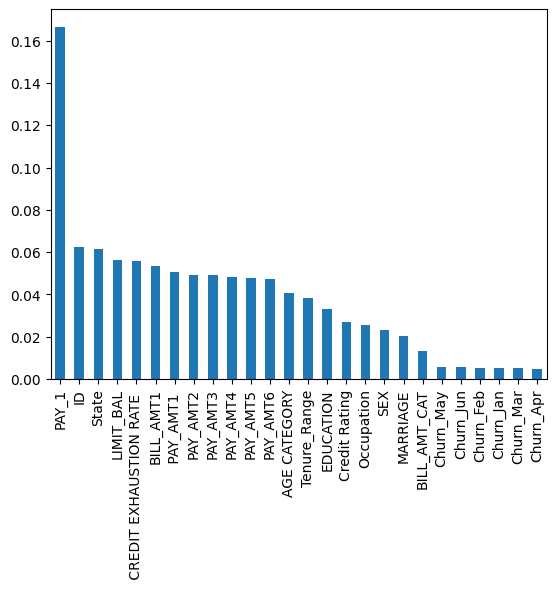

In [84]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [93]:
X_imp = X[feat_importances.nlargest(19).index]
X_imp

,PAY_1,ID,State,LIMIT_BAL,CREDIT EXHAUSTION RATE,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE CATEGORY,Tenure_Range,EDUCATION,Credit Rating,Occupation,SEX,MARRIAGE
0,2.134188,-0.983986,1.349549,-1.130055,-0.757393,-0.678940,-0.207474,-0.275254,-0.193531,-0.201523,-0.199797,-0.195576,-1.048803,1.485088,1.013200,-1.521533,1.00052,-0.810752,-1.097184
1,-0.471936,0.351442,1.112981,-0.357463,-1.072036,-0.696111,-0.207474,-0.260215,-0.279815,-0.279698,-0.199797,-0.214959,-1.048803,-1.222644,1.013200,-0.690908,1.00052,-0.810752,0.923332
2,-0.471936,-1.239449,0.876414,-0.589240,-0.585770,-0.326242,-0.307162,-0.236036,-0.279815,-0.279698,-0.285381,-0.044434,0.028927,-1.222644,1.013200,-0.690908,1.00052,-0.810752,0.923332
3,-0.471936,-1.253416,0.639846,-0.898277,1.073254,-0.078889,-0.274740,-0.210939,-0.267489,-0.273161,-0.280839,-0.271801,0.028927,-1.222644,1.013200,0.970342,1.00052,-0.810752,-1.097184
4,-0.471936,1.102482,-0.542992,-0.898277,-0.099504,-0.613042,-0.274740,1.465234,0.274867,0.243207,-0.305856,-0.290047,2.184388,1.485088,1.013200,0.970342,1.00052,1.233423,-1.097184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,-0.471936,-0.882126,1.349549,-0.898277,1.044651,-0.084458,-0.290346,-0.208472,-0.262558,-0.304797,-0.309345,-0.292264,1.106658,1.485088,1.013200,0.970342,-0.99948,1.233423,0.923332
24995,-0.471936,-0.983557,1.349549,-0.048426,1.387897,1.374599,-0.039308,0.032542,0.059836,-0.050927,-0.054962,-0.072855,1.106658,-0.545711,0.285899,-0.690908,-0.99948,1.233423,-1.097184
24996,2.134188,1.119174,-0.069856,-0.666500,1.473709,0.217192,0.016187,-0.166836,-0.180465,0.015743,-0.199797,-0.158231,1.106658,-0.545711,1.013200,-0.690908,-0.99948,1.233423,-1.097184
24997,-0.471936,-1.687038,-0.779559,0.337870,0.014911,2.062824,0.362743,-0.131680,-0.193531,-0.279698,-0.232714,0.467994,1.106658,-1.222644,-0.441402,0.139717,1.00052,1.233423,0.923332


In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [95]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 100.0 

Test Accuracy:- 81.44 

confusion_matrix:- 
 [[15544     0]
 [    0  4455]] 

classification_report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15544
           1       1.00      1.00      1.00      4455

    accuracy                           1.00     19999
   macro avg       1.00      1.00      1.00     19999
weighted avg       1.00      1.00      1.00     19999



# hyperparameters

In [96]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [97]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [98]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [99]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [100]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 35}

In [101]:
RF = RandomForestClassifier(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='sqrt',max_depth = 35)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 87.974398719936 

Test Accuracy:- 81.74 

confusion_matrix:- 
 [[15347   197]
 [ 2208  2247]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     15544
           1       0.92      0.50      0.65      4455

    accuracy                           0.88     19999
   macro avg       0.90      0.75      0.79     19999
weighted avg       0.88      0.88      0.87     19999



# Parameter Tuning for (XGB)Extreme Gradient Boosting

In [102]:
# Define the hyperparameter grid to search
random_grid = {
    'n_estimators': [i for i in range(100,500,100)],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [i for i in range(5,50,6)],
    'min_child_weight': [2,5,10,15,50],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [103]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = XGB,param_distributions = random_grid,cv=4,random_state = 0)

In [104]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'min_child_weight': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=0)

In [105]:
rf_model.best_params_

{'subsample': 1.0,
 'n_estimators': 400,
 'min_child_weight': 50,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.9}

In [106]:
XGB=XGBClassifier(n_estimators= 400,subsample= 1.0,min_child_weight= 50,max_depth= 5,learning_rate= 0.1,gamma=0,colsample_bytree= 0.9)
XGB.fit(X_train, y_train)
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_test, y_test_pred),"\n")
print("classification_report:-","\n",classification_report(y_test, y_test_pred))

Train Accuracy:- 83.84419220961048 

Test Accuracy:- 81.58 

confusion_matrix:- 
 [[3697  181]
 [ 740  382]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      3878
           1       0.68      0.34      0.45      1122

    accuracy                           0.82      5000
   macro avg       0.76      0.65      0.67      5000
weighted avg       0.80      0.82      0.79      5000



# Conclusion:
 **In the course of this project, the XGBoost (XGB) model emerged as the most effective, delivering optimal results. Its robust performance underscores its suitability for the given dataset, showcasing its capability to yield superior outcomes compared to alternative models. The utilization of XGBoost demonstrates a successful approach in addressing the objectives of the project, providing a reliable and high-performing solution.**